# Case Study 2 : Data Mining in Yelp Data


Please download the Yelp dataset in Case Study 2 in BrightSpace. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [70]:

# what problem are you trying to solve?

# Finding the most highly rated business categories.

    
# why this problem is important and interesting?
"""
This helps users discover the best industries with consistently high ratings, aiding business decisions
and customer choices.
Identifying the most highly rated business categories helps consumers find reliable and well-reviewed services. 
Businesses with high ratings often indicate excellent service quality, helping both new customers and business owners. 
"""
    


'\nThis helps users discover the best industries with consistently high ratings, aiding business decisions\nand customer choices.\nIdentifying the most highly rated business categories helps consumers find reliable and well-reviewed services. \nBusinesses with high ratings often indicate excellent service quality, helping both new customers and business owners. \n'

# Data Collection/Processing: 

In [72]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json
import pandas as pd
import matplotlib.pyplot as plt

# Load Yelp Business Data
def load_business_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)

# Load Yelp checkin Data
def load_checkin_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)


# File paths
business_file = "yelp_academic_dataset_business.json"
checkin_file = "yelp_academic_dataset_checkin.json"

# Load datasets
business_df = load_business_data(business_file)
checkin_df = load_checkin_data(checkin_file)




# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

Business DataFrame Head:
              business_id                  name               neighborhood  \
0  Apn5Q_b6Nz61Tq4XzPdf9A  Minhas Micro Brewery                              
1  AjEbIBw6ZFfln7ePHha9PA   CK'S BBQ & Catering                              
2  O8S5hYJ1SMc8fA4QBtVujA         La Bastringue  Rosemont-La Petite-Patrie   
3  bFzdJJ3wp3PZssNEsyU23g       Geico Insurance                              
4  8USyCYqpScwiNEb58Bt6CA         Action Engine                              

               address       city state postal_code   latitude   longitude  \
0    1314 44 Avenue NE    Calgary    AB     T2E 6L6  51.091813 -114.031675   
1                       Henderson    NV       89002  35.960734 -114.939821   
2  1335 rue Beaubien E   Montréal    QC     H2G 1K7  45.540503  -73.599300   
3      211 W Monroe St    Phoenix    AZ       85003  33.449999 -112.076979   
4  2005 Alyth Place SE    Calgary    AB     T2H 0N5  51.035591 -114.027366   

   stars  review_count  is_open  \
0 

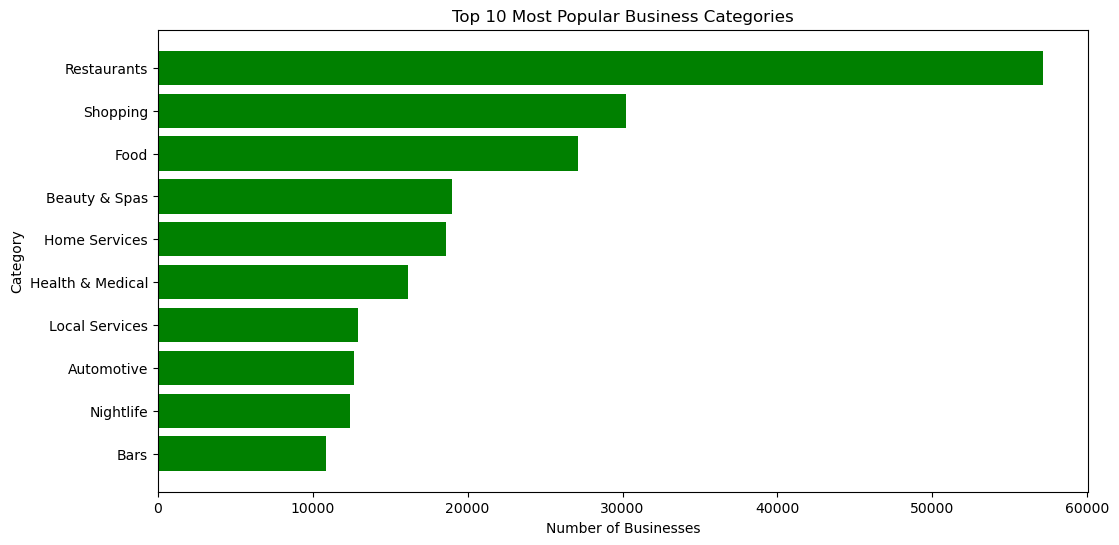

In [74]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



# Exploratory Data Analysis
print("Business DataFrame Head:")
print(business_df.head())

print("Check-in DataFrame Head:")
print(checkin_df.head())



# Finding the top 10 most popular business categories

# Ensure the categories column is a string and remove NaN values.
business_df = business_df[business_df['categories'].notna()]

# Split the categories column into multiple categories.
business_df_exploded = business_df.assign(categories=business_df['categories'].str.split(', ')).explode('categories')

# Count the occurrences of each category.
category_counts = business_df_exploded['categories'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Select the top 10 most common categories.
top_categories = category_counts.head(10)

print("Top 10 most popular business categories:")
print(top_categories)


# Visualization
# Plot top 10 categories
plt.figure(figsize=(12, 6))
plt.barh(top_categories['category'][::-1], top_categories['count'][::-1], color='green')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.title('Top 10 Most Popular Business Categories')
plt.show()



**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

Top 10 most popular business objects:
                  business_id  total_checkins
12285  jf67Z1pnwElRSXllpQHiJg           77320
2905   hW0Ne_HTHEAgGF1rAdmR-g           68711
828    3Q0QQPnHcJuX1DLCL9G9Cg           29893
31015  AtjsjFzalWqJ7S9DUFQ4bw           27356
25634  JpHE7yhMS5ehA9e8WG_ETg           18208
14255  34uJtlPnKicSaX1V8_tu1A           18099
14261  eWPFXL1Bmu1ImtIa2Rqliw           17671
14248  -7yF42k0CcJhtPw51oaOqQ           17419
15418  z3SyT8blMIhsZNvKJgKcRA           17161
19756  2e2e7WgqU1BnpxmQL5jbfw           16641


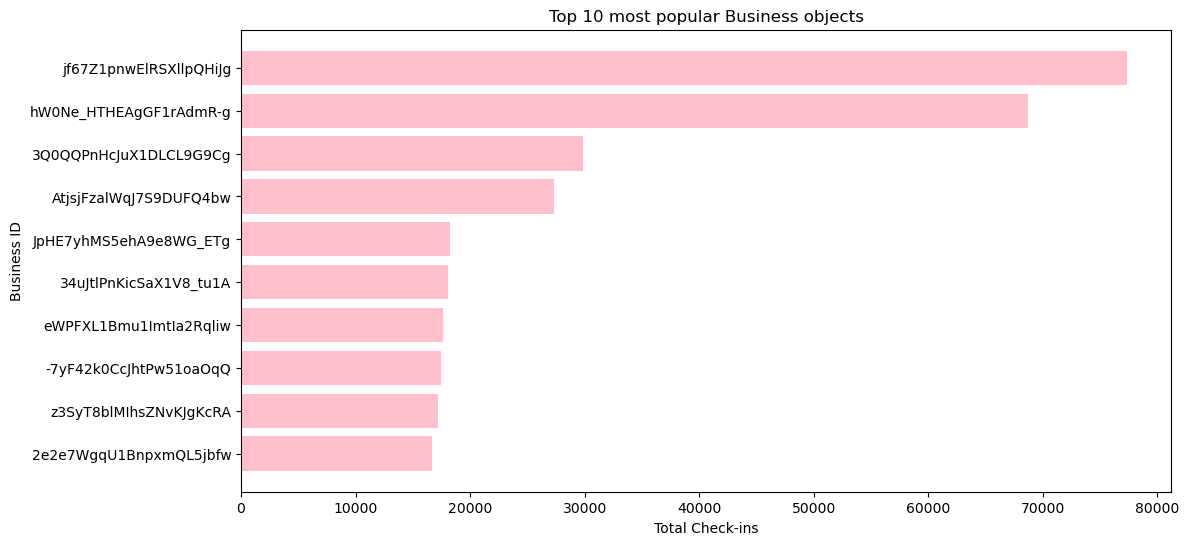

In [76]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



# Ensure the checkin_info field is in the correct format.
checkin_df['checkin_info'] = checkin_df['checkin_info'].apply(lambda x: x if isinstance(x, dict) else {})

# Compute the total number of check-ins.
checkin_df['total_checkins'] = checkin_df['checkin_info'].apply(lambda x: sum(x.values()))

# Sort by total check-ins in descending order and select the top 10 most popular business IDs.
top_businesses = checkin_df[['business_id', 'total_checkins']].sort_values(by='total_checkins', ascending=False).head(10)

print("Top 10 most popular business objects:")
print(top_businesses)


# Plot top 10 most popular business objects
plt.figure(figsize=(12, 6))
plt.barh(top_businesses['business_id'][::-1], top_businesses['total_checkins'][::-1], color='pink')
plt.xlabel('Total Check-ins')
plt.ylabel('Business ID')
plt.title('Top 10 most popular Business objects')
plt.show()


**(3) Other explorations you would like to present** 


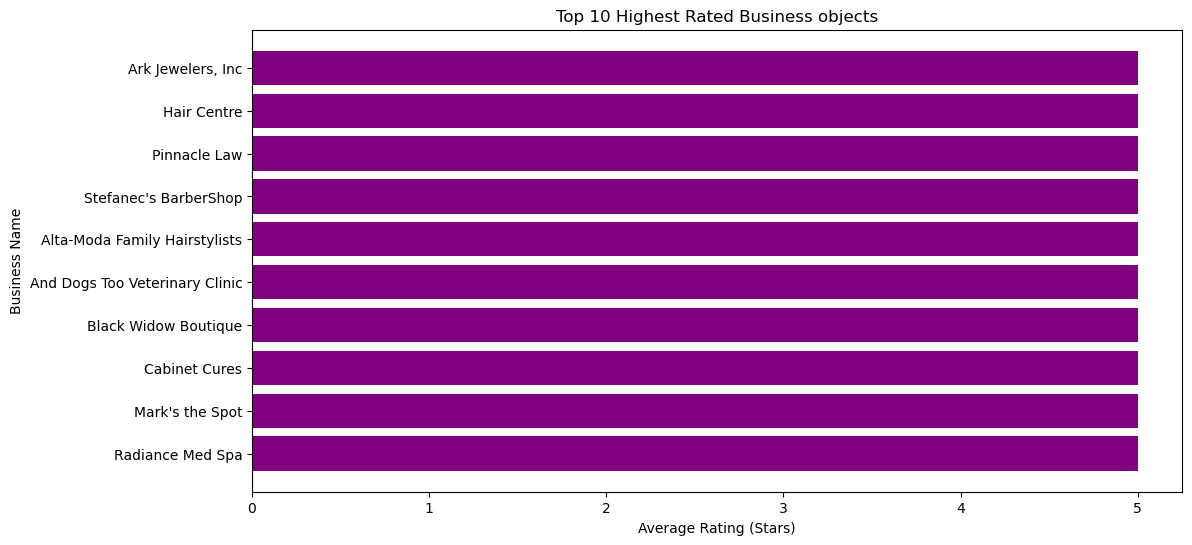

In [78]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Top 10 highest rated business objects
top_rated_businesses = business_df[['business_id', 'name', 'stars', 'categories']].sort_values(by='stars', ascending=False).head(10)

# Visualization Top 10 Highest Rated Business objects 
plt.figure(figsize=(12, 6))
plt.barh(top_rated_businesses['name'][::-1], top_rated_businesses['stars'][::-1], color='purple')
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Business Name')
plt.title('Top 10 Highest Rated Business objects')
plt.show()



# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [80]:

# Solution

"""
1. Extract all unique business categories from Yelp business dataset.
2. Compute the average rating for each category.
3. rank categories based on their average ratings.
4. Visualize the top-rated business categories.
"""


'\n1. Extract all unique business categories from Yelp business dataset.\n2. Compute the average rating for each category.\n3. rank categories based on their average ratings.\n4. Visualize the top-rated business categories.\n'

Write codes to implement the solution in python:

In [82]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Compute average rating for each category
category_ratings = business_df_exploded.groupby('categories')['stars'].mean().reset_index()
category_ratings.columns = ['category', 'average_rating']

# Get the top 10 highest-rated categories
top_rated_categories = category_ratings.sort_values(by='average_rating', ascending=False).head(10)




# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


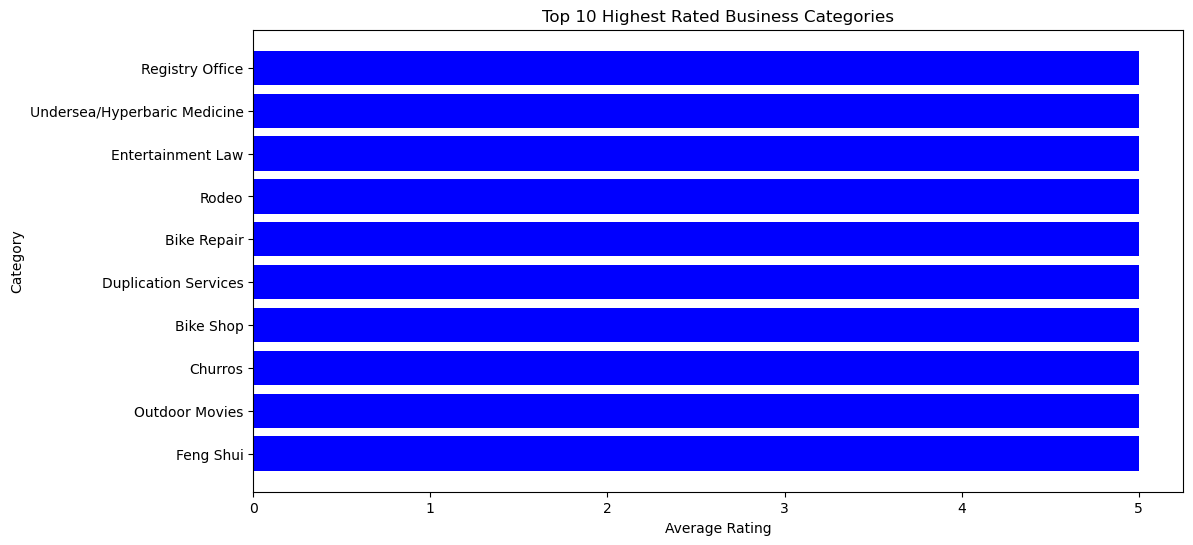

In [84]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# visualization
plt.figure(figsize=(12, 6))
plt.barh(top_rated_categories['category'][::-1], top_rated_categories['average_rating'][::-1], color='blue')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top 10 Highest Rated Business Categories')
plt.show()



*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 